In [1]:
import torch
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt


In [3]:

# 读取保存的模型
def load_models(file_path):
    
    state_dicts, model_names, distributed_percent, overall_pred = torch.load(file_path)
    
    print('model_names:', model_names)
    print('state_dicts:', state_dicts)
    print('distributed_percent:', distributed_percent, '\n', np.array(distributed_percent).shape)
    print('overall_pred:', overall_pred, '\n', np.array(overall_pred).shape)

    
    return state_dicts, model_names, distributed_percent, overall_pred

file_path = 'exp_result/news20\Q1/0/trained_models\parties4_topmodel0_epoch300/NoDefense.pkl'  # 替换为你的文件路径
# state_dicts, model_names = load_models(file_path)
state_dicts, model_names, distributed_percent, overall_pred = load_models(file_path)

# 打印模型名称以确认加载成功
# print(model_names)


model_names: ['LogisticRegressionModel_Flatten', 'LogisticRegressionModel_Flatten', 'LogisticRegressionModel_Flatten', 'LogisticRegressionModel_Flatten', 'ClassificationModelHostHead']
state_dicts: [OrderedDict([('layer1.1.weight', tensor([[-9.6640e-01,  9.6787e-01, -4.2037e-01, -2.5008e-01, -1.0078e+00,
         -2.1743e-01, -5.7106e-01, -3.0447e-01, -3.0823e-01, -7.9845e-01,
         -8.2191e-01, -2.2592e-01, -3.5112e-01,  7.4811e-01,  6.4427e-01,
          4.9777e-02, -1.1079e+00, -4.3092e-01, -4.5375e-01,  1.8400e-01,
         -5.1125e-01,  2.7178e-02, -3.9386e-01, -1.0462e+00,  3.1552e-01,
         -5.4702e-01, -6.8017e-01,  7.3864e-01,  3.7682e-01, -5.2554e-01,
         -6.6330e-01, -7.6831e-01, -4.4117e-01, -8.1840e-01, -7.5177e-01,
         -3.9388e-01, -6.9113e-02, -6.0270e-01,  6.0118e-02, -4.0044e-01,
         -6.6800e-01,  2.2664e-01, -5.1634e-01, -8.2402e-01, -1.4682e-01,
          7.9417e-01, -1.1225e-01,  6.1917e-01, -2.5585e-02, -6.5187e-01,
          1.7845e-01, -4.500

In [17]:
file_path = 'exp_result/news20\Q1/0/trained_models\parties4_topmodel0_epoch300/reduce_features.txt'
with open(file_path, 'r') as f:
    reduce_features = f.readlines()
    reduce_features = [int(i) for i in reduce_features]
    print('reduce_features:', reduce_features)
print('reduce_features:', np.array(reduce_features).shape)


reduce_features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [2]:
hist_pred = torch.load('exp_result/adult_income/trained_models\orginal/historical_clients_pred.pkl')
# print('hist_pred:', hist_pred, '\n', np.array(hist_pred).shape)
# hist_pred has 4 dimensions: [epoch, num_parties, num_samples, num_features], use next epoch pred to subtract current epoch pred to get the delta, wich has 4 dimensions: [epoch, num_parties, num_samples, num_features],but the number of epoch is 1 less than the number of hist_pred
hist_pred = torch.tensor(hist_pred)
delta = hist_pred.diff(dim=0)
# print('delta:', delta, '\n', np.array(delta).shape)
delta = delta.numpy()
# sum delta's second dimension and divede to get the average distributed percent
# delta_sum_by_party = np.sum(delta, axis=1, keepdims=True)
# # print('delta_sum_by_party:', delta_sum_by_party, '\n', np.array(delta_sum_by_party).shape)
# delta_distribution = delta / delta_sum_by_party
delta_distribution = delta
# if np.sum(delta, axis=1, keepdims=True) have data close to 0, then the distributed percent will be vary large, so do not record the distributed percent if the sum absolute value of delta is smaller than 0.05
# delta_distribution and delta_sum_by_party have the different shape, delta_distribution is [epoch, num_parties, num_samples, num_features], delta_sum_by_party is [epoch, 1, num_samples, num_features]
# for partys in range(delta_distribution.shape[1]):
    # delta_distribution[:, partys, :, :] = np.where((np.abs(delta_sum_by_party) < 1e-3).reshape(np.array(delta_sum_by_party).shape[0], np.array(delta_sum_by_party).shape[2], np.array(delta_sum_by_party).shape[3]), np.nan, delta_distribution[:, partys, :, :])


print('delta_distribution:', delta_distribution, '\n', np.array(delta_distribution).shape)

C:\Users\PC\AppData\Local\Temp\ipykernel_1344\3599185934.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  hist_pred = torch.tensor(hist_pred)


delta_distribution: [[[[ 9.85981822e-02 -9.85984802e-02]
   [-2.01966584e-01  2.01966211e-01]
   [-1.18146166e-01  1.18145823e-01]
   ...
   [ 2.24233136e-01 -2.24233210e-01]
   [-1.27550513e-02  1.27547234e-02]
   [-6.30259067e-02  6.30256534e-02]]

  [[ 2.01463103e-02 -2.01464891e-02]
   [ 6.24091923e-03 -6.24100864e-03]
   [ 2.01463103e-02 -2.01464891e-02]
   ...
   [ 9.43275392e-02 -9.43276882e-02]
   [ 9.43275392e-02 -9.43276882e-02]
   [ 2.01463103e-02 -2.01464891e-02]]

  [[ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]
   ...
   [-9.16885883e-02  9.16884392e-02]
   [ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]]

  ...

  [[ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]
   ...
   [ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]
   [ 6.24091923e-03 -6.24100864e-03]]

  [[-1.55191422e-01  1.55191243e-01]
   [-1.07047

In [3]:

# convert the above compare calculation to a function
def compare_delta_distribution(delta_distribution, party=0, sample=0):
    diff_list = []
    for i in range(1, np.array(delta_distribution).shape[0]):
        print('epoch:', i)
        print('pred_delta_percent:', delta_distribution[i,0,0,:])
        print('before_epoch_pred_delta_percent:', delta_distribution[i-1,0,0,:])
        print('diff:', delta_distribution[i,0,0,:] - delta_distribution[i-1,0,0,:])
        diff = delta_distribution[i,0,0,:] - delta_distribution[i-1,0,0,:]
        diff_list.append(diff)
    return np.array(diff_list)
    
compare_delta_distribution(delta_distribution, party=0, sample=0)

epoch: 1
pred_delta_percent: [ 0.00403696 -0.00403708]
before_epoch_pred_delta_percent: [ 0.09859818 -0.09859848]
diff: [-0.09456122  0.0945614 ]
epoch: 2
pred_delta_percent: [ 0.01032501 -0.01032531]
before_epoch_pred_delta_percent: [ 0.00403696 -0.00403708]
diff: [ 0.00628805 -0.00628823]
epoch: 3
pred_delta_percent: [ 0.00936288 -0.00936303]
before_epoch_pred_delta_percent: [ 0.01032501 -0.01032531]
diff: [-0.00096214  0.00096229]
epoch: 4
pred_delta_percent: [ 0.00763386 -0.00763401]
before_epoch_pred_delta_percent: [ 0.00936288 -0.00936303]
diff: [-0.00172901  0.00172901]
epoch: 5
pred_delta_percent: [ 0.00671875 -0.00671893]
before_epoch_pred_delta_percent: [ 0.00763386 -0.00763401]
diff: [-0.00091511  0.00091508]
epoch: 6
pred_delta_percent: [ 0.00577575 -0.00577593]
before_epoch_pred_delta_percent: [ 0.00671875 -0.00671893]
diff: [-0.00094301  0.00094301]
epoch: 7
pred_delta_percent: [ 0.00505877 -0.005059  ]
before_epoch_pred_delta_percent: [ 0.00577575 -0.00577593]
diff: [-0.

array([[-9.45612192e-02,  9.45613980e-02],
       [ 6.28805161e-03, -6.28823042e-03],
       [-9.62138176e-04,  9.62287188e-04],
       [-1.72901154e-03,  1.72901154e-03],
       [-9.15110111e-04,  9.15080309e-04],
       [-9.43005085e-04,  9.43005085e-04],
       [-7.16984272e-04,  7.16924667e-04],
       [-5.98669052e-04,  5.98698854e-04],
       [-5.04016876e-04,  5.04076481e-04],
       [-4.28378582e-04,  4.28467989e-04],
       [-3.67879868e-04,  3.67671251e-04],
       [-3.18408012e-04,  3.18586826e-04],
       [-2.77638435e-04,  2.77459621e-04],
       [-2.43306160e-04,  2.43455172e-04],
       [-2.14397907e-04,  2.14427710e-04],
       [-1.90019608e-04,  1.89870596e-04],
       [-1.68561935e-04,  1.68740749e-04],
       [-1.50442123e-04,  1.50352716e-04],
       [-1.34646893e-04,  1.34646893e-04],
       [-1.20639801e-04,  1.20669603e-04],
       [-1.08540058e-04,  1.08569860e-04],
       [-9.79900360e-05,  9.78410244e-05],
       [-8.83042812e-05,  8.83340836e-05],
       [-7.

count    1.005464e+08
mean     1.480856e-10
std      7.772723e-03
min     -5.971547e-01
25%     -1.128763e-05
50%      0.000000e+00
75%      1.128018e-05
max      5.971549e-01
dtype: float64


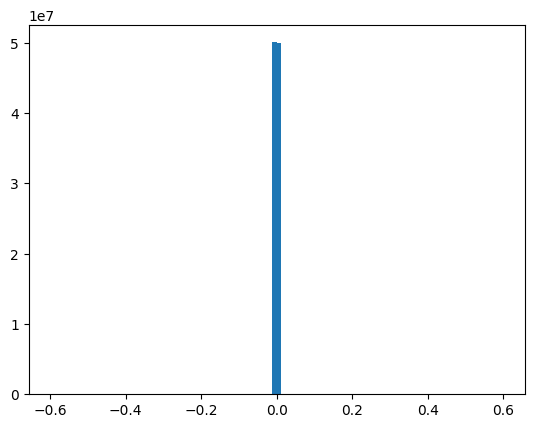

: 

In [ ]:
# caculate the diff in the whole delta_distribution
delta_distribution_diff = torch.tensor(delta_distribution).diff(dim=0)
# print('delta_distribution_diff:', delta_distribution_diff, '\n', np.array(delta_distribution_diff).shape)
delta_distribution_diff = delta_distribution_diff.numpy().reshape(-1)
print(pd.Series(delta_distribution_diff).describe())
plt.hist(delta_distribution_diff, bins=100)
plt.show()

logistic regression

In [2]:
import numpy as np

# 给定参数
theta = np.array([4, -2, -5, 1, 3])

# 生成特征数据
np.random.seed(42)  # 固定随机种子以便复现结果
# 特征限定在[0, 1]之间
X_A = np.random.rand(100000, 2)
X_B = np.random.rand(100000, 1)
X_C = np.random.rand(100000, 1)
X_D = np.random.rand(100000, 1)

# from A to D, add bias
X_A = np.hstack((np.ones((X_A.shape[0], 1)), X_A))
# X_B = np.hstack((np.ones((X_B.shape[0], 1)), X_B))
# X_C = np.hstack((np.ones((X_C.shape[0], 1)), X_C))
# X_D = np.hstack((np.ones((X_D.shape[0], 1)), X_D))


# 合并特征
X = np.hstack((X_A, X_B, X_C, X_D))

# 计算标签
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.array([0.1, 4, -2, -5, 1, 3])
y_prob = sigmoid(X @ theta)
y = (y_prob >= 0.5).astype(int)



# 输出生成的数据集
print("X_A:")
print(X_A.shape)
print('X_B:')
print(X_B.shape)
print('X_C:')
print(X_C.shape)
print('X_D:')
print(X_D.shape)
print('X:')
print(X.shape)
print('y:')
print(y.shape)
print(y[y==0].shape[0] / y.shape[0])


X_A:
(100000, 3)
X_B:
(100000, 1)
X_C:
(100000, 1)
X_D:
(100000, 1)
X:
(100000, 6)
y:
(100000,)
0.39452


In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# 特征标准化
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# LogisticRegression model without intercept
model = LogisticRegression(fit_intercept=False)
model.fit(X, y)

# 输出参数
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")
# theta = np.array([0.1, 4, -2, -5, 1, 3])

Model coefficients: [[  0.74557225  31.99413181 -15.93322463 -39.95300563   8.00795601
   24.00280174]]
Model intercept: [0.]


Converged after 16399 iterations
Iteration 17000: theta_A = [ 0.36274405 11.14697942 -5.53564413], theta_B = [-14.00291556], theta_C = [2.7960773], theta_D = [8.32922726]
Iteration 18000: theta_A = [ 0.36552251 11.38904146 -5.6568928 ], theta_B = [-14.30289844], theta_C = [2.85694135], theta_D = [8.51160227]
Iteration 19000: theta_A = [ 0.36827459 11.62193646 -5.77351522], theta_B = [-14.59158116], theta_C = [2.91548776], theta_D = [8.68705033]
Iteration 20000: theta_A = [ 0.3709997  11.84647536 -5.88592407], theta_B = [-14.86996136], theta_C = [2.97192159], theta_D = [8.8561853]
Iteration 21000: theta_A = [ 0.37369721 12.06336075 -5.99447628], theta_B = [-15.13890325], theta_C = [3.02642062], theta_D = [9.01953895]
Iteration 22000: theta_A = [ 0.3763666  12.27320574 -6.09948283], theta_B = [-15.39916097], theta_C = [3.07914009], theta_D = [9.17757526]
Iteration 23000: theta_A = [ 0.37900745 12.47654882 -6.20121656], theta_B = [-15.65139692], theta_C = [3.13021638], theta_D = [9.330701

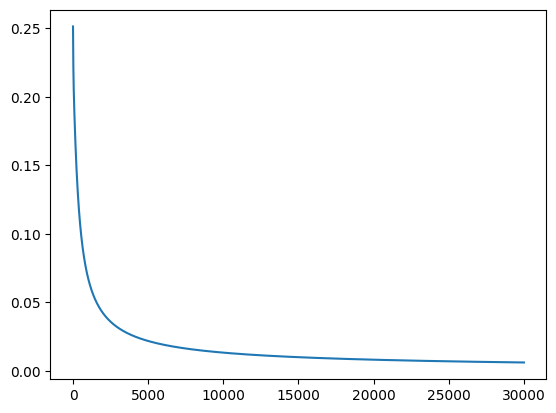

In [4]:
# 初始化参数
theta_A = np.array([0.1, 0.1, 0.1])
theta_B = np.array([0.1])
theta_C = np.array([0.1])
theta_D = np.array([0.1])
learning_rate = 0.1
iterations = 30000

# 逻辑回归预测函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 计算损失函数的梯度
def compute_gradient(X_A, X_B, X_C, X_D, y, theta_A, theta_B, theta_C, theta_D):
    m = len(y)
    h = sigmoid(np.dot(X_A, theta_A) + np.dot(X_B, theta_B) + np.dot(X_C, theta_C) + np.dot(X_D, theta_D))

    error = h - y
    grad_A = np.dot(X_A.T, error) / m
    grad_B = np.dot(X_B.T, error) / m
    grad_C = np.dot(X_C.T, error) / m
    grad_D = np.dot(X_D.T, error) / m
    loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    return grad_A, grad_B, grad_C, grad_D, loss

grad_abs_sum_list = []
loss_list = []
A_part = []
B_part = []
C_part = []
D_part = []
flag = 0
# 梯度下降优化
for i in range(iterations):
    grad_A, grad_B, grad_C, grad_D, loss = compute_gradient(X_A, X_B, X_C, X_D, y, theta_A, theta_B, theta_C, theta_D)
    # if i < 1000:
    if i >= iterations - 1000:
        h_A = np.dot(X_A, theta_A)
        h_B = np.dot(X_B, theta_B)
        h_C = np.dot(X_C, theta_C)
        h_D = np.dot(X_D, theta_D)
        h = h_A + h_B + h_C + h_D
    theta_A -= learning_rate * grad_A
    theta_B -= learning_rate * grad_B
    theta_C -= learning_rate * grad_C
    theta_D -= learning_rate * grad_D
    # if i < 1000:
    if i >= iterations - 1000:
        delta_h_A = np.dot(X_A, theta_A) - h_A
        delta_h_B = np.dot(X_B, theta_B) - h_B
        delta_h_C = np.dot(X_C, theta_C) - h_C
        delta_h_D = np.dot(X_D, theta_D) - h_D
        delta_h = delta_h_A + delta_h_B + delta_h_C + delta_h_D
        # A_contribution = delta_h_A / delta_h
        # B_contribution = delta_h_B / delta_h
        # C_contribution = delta_h_C / delta_h
        # D_contribution = delta_h_D / delta_h
        A_part.append(delta_h_A / delta_h)
        B_part.append(delta_h_B / delta_h)
        C_part.append(delta_h_C / delta_h)
        D_part.append(delta_h_D / delta_h)
    # if (i+1) % 1000 == 0:
    #     print(f"Iteration {i+1}: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}, theta_D = {theta_D}")
    grad_abs_sum = np.sum(np.abs(grad_A)) + np.sum(np.abs(grad_B)) + np.sum(np.abs(grad_C)) + np.sum(np.abs(grad_D))
    grad_abs_sum_list.append(grad_abs_sum)
    loss_list.append(np.abs(loss).mean())
    if np.abs(loss).mean() < 0.1 and flag == 0:
        print(f"Converged after {i+1} iterations")
        flag = 1
    if flag == 1 and (i+1) % 1000 == 0:
        print(f"Iteration {i+1}: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}, theta_D = {theta_D}")

print(f"Final parameters: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}, theta_D = {theta_D}")
# plot the grad_abs_sum_list and error_list
plt.plot(grad_abs_sum_list)
plt.show()
# theta = np.array([0.1, 4, -2, -5, 1, 3])


In [7]:
diff = torch.Tensor(A_part).diff(dim=0).numpy()
diff = diff / np.mean(A_part, axis=0)

In [8]:
diff_2 = diff.mean(axis=0)
print(pd.Series(diff_2).describe())
col_index = np.where(diff_2 < -28)
# diff[:, col_index]
np.array(A_part)[:, col_index]

count    1.000000e+05
mean     2.847547e-05
std      9.184099e-03
min     -7.077849e-02
25%     -3.152400e-07
50%      2.189886e-07
75%      8.632686e-07
max      2.902920e+00
dtype: float64


array([], shape=(1000, 1, 0), dtype=float64)

In [154]:
A_part[-1][col_index], B_part[-1][col_index], C_part[-1][col_index], D_part[-1][col_index], delta_h_A[col_index], delta_h_B[col_index], delta_h_C[col_index], delta_h_D[col_index], delta_h[col_index],

(array([-29701.28836366]),
 array([38807.25066643]),
 array([-4033.09943345]),
 array([-5071.86286932]),
 array([3.75693003e-05]),
 array([-4.90874752e-05]),
 array([5.10148658e-06]),
 array([6.41542337e-06]),
 array([-1.26490474e-09]))

count    9.990000e+07
mean     3.055143e-04
std      1.366566e+04
min     -7.504889e+07
25%     -5.364418e-07
50%      5.960464e-08
75%      2.384186e-07
max      9.147836e+07
dtype: float64
percent of diff > -0.01 and < 0.01: 0.9983375775775776


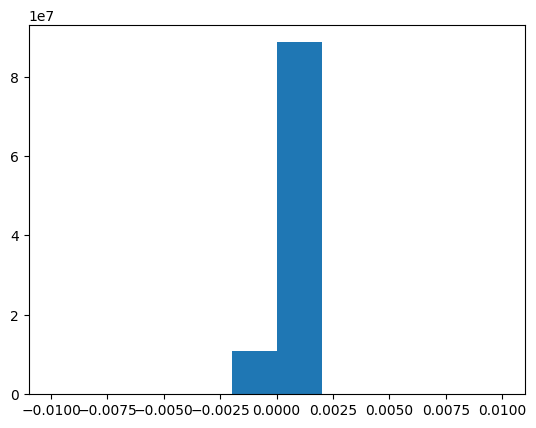

In [152]:
diff_1 = diff.reshape(-1)
print(pd.Series(diff_1).describe())
print('percent of diff > -0.01 and < 0.01:', diff_1[(diff_1 > -0.01) & (diff_1 < 0.01)].shape[0] / diff_1.shape[0])
diff_1_plot = diff_1[(diff_1 > -0.01) & (diff_1 < 0.01)]
plt.hist(diff_1_plot)
plt.show()

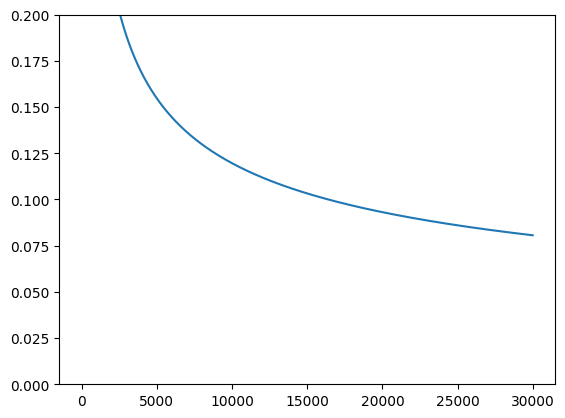

grandiet sum: 0.006267399250279495
error: 0.08063383489936124


In [91]:
plt.plot(loss_list)
plt.ylim(0, 0.2)
plt.show()
print('grandiet sum:', grad_abs_sum_list[-1])
print('error:', loss_list[-1])

unlearn client D retrain

In [66]:
XexpD = np.hstack((X_A, X_B, X_C))
# LogisticRegression model without intercept
model = LogisticRegression(fit_intercept=False)
model.fit(XexpD, y)

# 输出参数
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")
# theta = np.array([0.1, 4, -2, -5, 1])

Model coefficients: [[ 3.11798243  8.02437866 -3.94921857 -9.960512    2.06048163]]
Model intercept: [0.]


Converged after 2537 iterations
Iteration 3000: theta_A = [ 3.80328655 13.05157728 -5.68907876], theta_B = [-15.22883997], theta_C = [3.77779039]
Iteration 4000: theta_A = [ 3.9609728  12.59211619 -5.67478495], theta_B = [-14.92868624], theta_C = [3.55157629]
Iteration 5000: theta_A = [ 4.05953412 12.18934749 -5.63939682], theta_B = [-14.62427182], theta_C = [3.35920967]
Iteration 6000: theta_A = [ 4.113256   11.83149479 -5.58678177], theta_B = [-14.32294915], theta_C = [3.19654896]
Iteration 7000: theta_A = [ 4.13330755 11.51019118 -5.52101849], theta_B = [-14.02912344], theta_C = [3.05917444]
Iteration 8000: theta_A = [ 4.12844323 11.21933817 -5.44590209], theta_B = [-13.74543928], theta_C = [2.94290783]
Iteration 9000: theta_A = [ 4.10552024 10.95438697 -5.36472485], theta_B = [-13.47348293], theta_C = [2.84404851]
Iteration 10000: theta_A = [ 4.06989125 10.71187623 -5.28021478], theta_B = [-13.21419314], theta_C = [2.75944973]
Iteration 11000: theta_A = [ 4.02571001 10.48912564 -5.

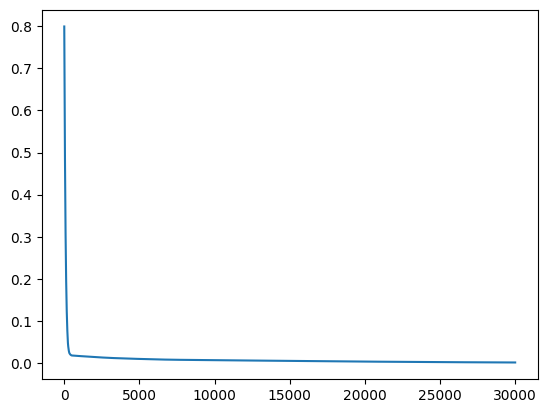

In [67]:
# 初始化参数
theta_A = np.array([0.39668638, 13.7520494, -6.83898064])
theta_B = np.array([-17.23445974])
theta_C = np.array([3.45039403])
learning_rate = 0.1
iterations = 30000

# 逻辑回归预测函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 计算损失函数的梯度
def compute_gradient(X_A, X_B, X_C, y, theta_A, theta_B, theta_C):
    m = len(y)
    h = sigmoid(np.dot(X_A, theta_A) + np.dot(X_B, theta_B) + np.dot(X_C, theta_C))
    error = h - y
    grad_A = np.dot(X_A.T, error) / m
    grad_B = np.dot(X_B.T, error) / m
    grad_C = np.dot(X_C.T, error) / m
    loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    return grad_A, grad_B, grad_C, loss

grad_abs_sum_list = []
loss_list = []
flag = 0
# 梯度下降优化
for i in range(iterations):
    grad_A, grad_B, grad_C, loss = compute_gradient(X_A, X_B, X_C, y, theta_A, theta_B, theta_C)
    theta_A -= learning_rate * grad_A
    theta_B -= learning_rate * grad_B
    theta_C -= learning_rate * grad_C

    grad_abs_sum = np.sum(np.abs(grad_A)) + np.sum(np.abs(grad_B)) + np.sum(np.abs(grad_C))
    grad_abs_sum_list.append(grad_abs_sum)
    loss_list.append(np.abs(loss).mean())
    if np.abs(loss).mean() < 0.3 and flag == 0:
        print(f"Converged after {i+1} iterations")
        flag = 1
    if flag == 1 and (i+1) % 1000 == 0:
        print(f"Iteration {i+1}: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}")

print(f"Final parameters: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}")
# plot the grad_abs_sum_list and error_list
plt.plot(grad_abs_sum_list)
plt.show()
# theta = np.array([0.1, 4, -2, -5, 1])


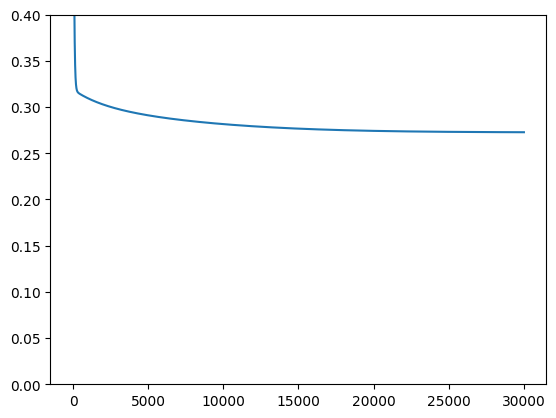

grandiet sum: 0.0013635874493909469
error: 0.27278110156514757


In [68]:
plt.plot(loss_list)
plt.ylim(0, 0.4)
plt.show()
print('grandiet sum:', grad_abs_sum_list[-1])
print('loss:', loss_list[-1])

unlearn client D 

In [92]:
# overall_pred = h_A + h_B + h_C + h_D + delta_h
# overall_pred_after_reduce = h_A + h_B + h_C + delta_h_A + delta_h_B + delta_h_C 
# A_contribution_after_reduce = A_contribution / (A_contribution + B_contribution + C_contribution)
# B_contribution_after_reduce = B_contribution / (A_contribution + B_contribution + C_contribution)
# C_contribution_after_reduce = C_contribution / (A_contribution + B_contribution + C_contribution)
A_contribution_after_reduce = A_part / (A_part + B_part + C_part)
B_contribution_after_reduce = B_part / (A_part + B_part + C_part)
C_contribution_after_reduce = C_part / (A_part + B_part + C_part)

In [39]:
# A_contribution_after_reduce[A_contribution_after_reduce > 30] = 30
# B_contribution_after_reduce[B_contribution_after_reduce > 30] = 30
# C_contribution_after_reduce[C_contribution_after_reduce > 30] = 30
# A_contribution_after_reduce[A_contribution_after_reduce < -30] = -30
# B_contribution_after_reduce[B_contribution_after_reduce < -30] = -30
# C_contribution_after_reduce[C_contribution_after_reduce < -30] = -30

# #convert the data whose absolute value is between 5 and 30 to between 5 and 10
# A_contribution_after_reduce[(A_contribution_after_reduce > 5) & (A_contribution_after_reduce <= 30)] = 5 + (A_contribution_after_reduce[(A_contribution_after_reduce > 5) & (A_contribution_after_reduce <= 30)] - 5) / 5
# B_contribution_after_reduce[(B_contribution_after_reduce > 5) & (B_contribution_after_reduce <= 30)] = 5 + (B_contribution_after_reduce[(B_contribution_after_reduce > 5) & (B_contribution_after_reduce <= 30)] - 5) / 5
# C_contribution_after_reduce[(C_contribution_after_reduce > 5) & (C_contribution_after_reduce <= 30)] = 5 + (C_contribution_after_reduce[(C_contribution_after_reduce > 5) & (C_contribution_after_reduce <= 30)] - 5) / 5
# A_contribution_after_reduce[(A_contribution_after_reduce < -5) & (A_contribution_after_reduce >= -30)] = -5 + (A_contribution_after_reduce[(A_contribution_after_reduce < -5) & (A_contribution_after_reduce >= -30)] + 5) / 5
# B_contribution_after_reduce[(B_contribution_after_reduce < -5) & (B_contribution_after_reduce >= -30)] = -5 + (B_contribution_after_reduce[(B_contribution_after_reduce < -5) & (B_contribution_after_reduce >= -30)] + 5) / 5
# C_contribution_after_reduce[(C_contribution_after_reduce < -5) & (C_contribution_after_reduce >= -30)] = -5 + (C_contribution_after_reduce[(C_contribution_after_reduce < -5) & (C_contribution_after_reduce >= -30)] + 5) / 5

 


count    100000.000000
mean         -0.449514
std         431.578532
min      -93011.519174
25%          -0.656720
50%           0.094785
75%           1.040622
max       83541.144173
dtype: float64
count    100000.000000
mean          2.728212
std         716.708119
min     -107065.860993
25%          -0.308370
50%           1.084088
75%           2.011952
max      148464.519597
dtype: float64
count    100000.000000
mean         -1.278698
std         322.624163
min      -81218.009172
25%          -0.362774
50%          -0.114790
75%           0.222761
max       23525.716820
dtype: float64


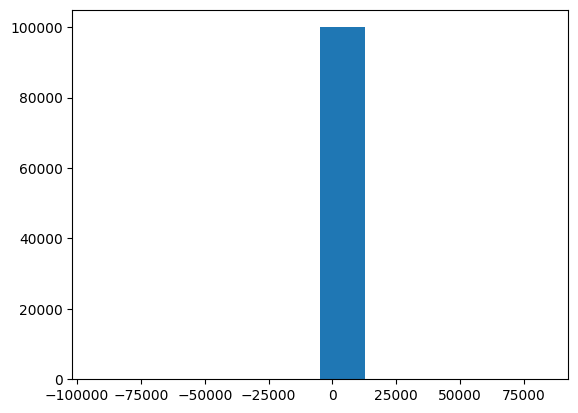

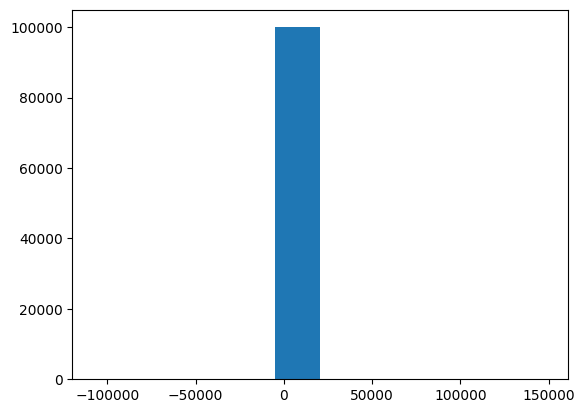

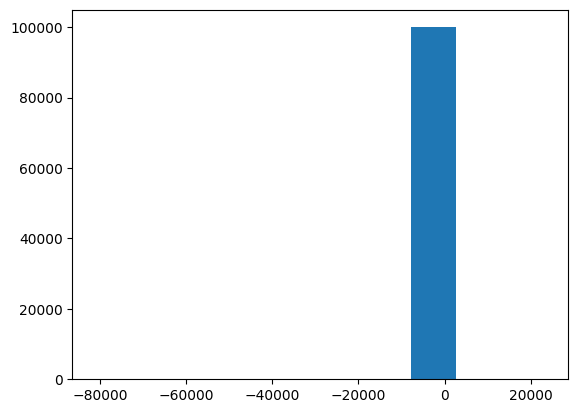

In [93]:
print(pd.Series(A_contribution_after_reduce).describe())
print(pd.Series(B_contribution_after_reduce).describe())
print(pd.Series(C_contribution_after_reduce).describe())
plt.hist(A_contribution_after_reduce)
plt.show()
plt.hist(B_contribution_after_reduce)
plt.show()
plt.hist(C_contribution_after_reduce)
plt.show()


Final parameters: theta_A = [19.80976653 44.73991837 -8.26702892], theta_B = [-1.0718926], theta_C = [44.90584691]


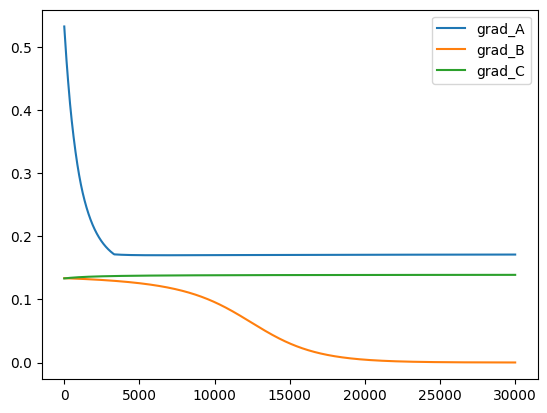

In [94]:
# trained model parameters
theta_A = np.array([0.39668638, 13.7520494, -6.83898064])
theta_B = np.array([-17.23445974])
theta_C = np.array([3.45039403])
# theta_D = [10.29094352]

learning_rate = 0.01
iterations = 30000
epsilon = 1e-10  

# 逻辑回归预测函数
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

grad_abs_sum_list1 = []
grad_abs_sum_list2 = []
grad_abs_sum_list3 = []
loss_list1 = []
loss_list2 = []
loss_list3 = []
flag = 0

h_overall_1 = h_A + h_B + h_C + delta_h_A + delta_h_B + delta_h_C
h_overall_2 = h_A + h_B + h_C + delta_h_A + delta_h_B + delta_h_C
h_overall_3 = h_A + h_B + h_C + delta_h_A + delta_h_B + delta_h_C
for i in range(iterations):
    error1 = sigmoid(h_overall_1) - y
    loss1 = -np.sum(y * np.log(sigmoid(h_overall_1) + epsilon) + (1 - y) * np.log(1 - sigmoid(h_overall_1) + epsilon)) / len(y)
    h_A1 = np.dot(X_A, theta_A)
    grad_A = np.dot(X_A.T, error1) / len(y)
    theta_A -= learning_rate * grad_A
    delta_h_A1 = np.dot(X_A, theta_A) - h_A1
    delta_h_overall1 = delta_h_A1 / A_contribution_after_reduce
    h_overall_1 += delta_h_overall1
    # print('delta_h_A:', delta_h_A)
    # print('A_contribution_after_reduce:', A_contribution_after_reduce)
    # print('delta_h_overall:', delta_h_overall)

    error2 = sigmoid(h_overall_2) - y
    loss2 = -np.sum(y * np.log(sigmoid(h_overall_2) + epsilon) + (1 - y) * np.log(1 - sigmoid(h_overall_2) + epsilon)) / len(y)
    h_B2 = np.dot(X_B, theta_B)
    grad_B = np.dot(X_B.T, error2) / len(y)
    theta_B -= learning_rate * grad_B
    delta_h_B2 = np.dot(X_B, theta_B) - h_B2
    delta_h_overall2 = delta_h_B2 / B_contribution_after_reduce
    h_overall_2 += delta_h_overall2

    error3 = sigmoid(h_overall_3) - y
    loss3 = -np.sum(y * np.log(sigmoid(h_overall_3) + epsilon) + (1 - y) * np.log(1 - sigmoid(h_overall_3) + epsilon)) / len(y)
    h_C3 = np.dot(X_C, theta_C)
    grad_C = np.dot(X_C.T, error3) / len(y)
    theta_C -= learning_rate * grad_C
    delta_h_C3 = np.dot(X_C, theta_C) - h_C3
    delta_h_overall3 = delta_h_C3 / C_contribution_after_reduce
    h_overall_3 += delta_h_overall3

    grad_abs_sum_list1.append(np.sum(np.abs(grad_A)))
    grad_abs_sum_list2.append(np.sum(np.abs(grad_B)))
    grad_abs_sum_list3.append(np.sum(np.abs(grad_C)))
    loss_list1.append(np.abs(loss1).mean())
    loss_list2.append(np.abs(loss2).mean())
    loss_list3.append(np.abs(loss3).mean())
    if np.abs(loss1).mean() < 0.2 and flag == 0:
        print(f"Converged after {i+1} iterations")
        flag = 1
    if flag == 1 and (i+1) % 1000 == 0:
        print(f"Iteration {i+1}: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}")

print(f"Final parameters: theta_A = {theta_A}, theta_B = {theta_B}, theta_C = {theta_C}")
# plot the grad_abs_sum_list and error_list
plt.plot(grad_abs_sum_list1)
plt.plot(grad_abs_sum_list2)
plt.plot(grad_abs_sum_list3)
plt.legend(['grad_A', 'grad_B', 'grad_C'])
plt.show()
# theta_A = [ 3.10742021  8.00221705 -3.93605992], theta_B = [-9.93202022], theta_C = [2.05584897]

(array([2.6981e+04, 3.7000e+02, 2.2000e+02, 1.8900e+02, 1.8100e+02,
        1.9800e+02, 2.3900e+02, 4.1000e+02, 7.1208e+04, 4.0000e+00]),
 array([-1.        , -0.8840401 , -0.76808021, -0.65212031, -0.53616042,
        -0.42020052, -0.30424063, -0.18828073, -0.07232083,  0.04363906,
         0.15959896]),
 <BarContainer object of 10 artists>)

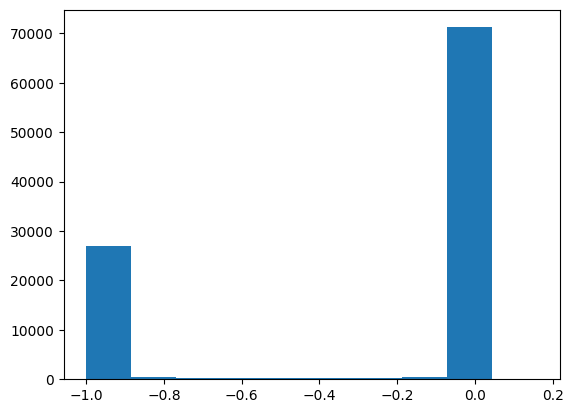

In [97]:
plt.hist(error3)

In [98]:
# 初始化参数
theta_A = np.array([20.02539538, 44.87209323, -8.16344209])
theta_B = np.array([-1.13240737])
theta_C = np.array([44.96838633])

# 逻辑回归预测函数
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# 计算损失函数的梯度
def compute_gradient(X_A, X_B, X_C, y, theta_A, theta_B, theta_C):
    m = len(y)
    h = sigmoid(np.dot(X_A, theta_A) + np.dot(X_B, theta_B) + np.dot(X_C, theta_C))
    error = h - y
    grad_A = np.dot(X_A.T, error) / m
    grad_B = np.dot(X_B.T, error) / m
    grad_C = np.dot(X_C.T, error) / m
    loss = -np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)) / m
    return grad_A, grad_B, grad_C, loss

grad_tmp1, grad_tmp2, grad_tmp3, loss_tmp = compute_gradient(X_A, X_B, X_C, y, theta_A, theta_B, theta_C)
print(f"Gradient_A: {grad_tmp1}, Gradient_B: {grad_tmp2}, Gradient_C: {grad_tmp3}, Loss: {loss_tmp}")
print(f"Gradient_A approx: {grad_A}, Gradient_B approx: {grad_B}, Gradient_C approx: {grad_C}")


Gradient_A: [0.39452    0.13758891 0.22605973], Gradient_B: [0.27625207], Gradient_C: [0.18233807], Loss: 9.037301793423984
Gradient_A approx: [-0.05750004 -0.10300234  0.01058113], Gradient_B approx: [-7.45514914e-05], Gradient_C approx: [-0.13891865]


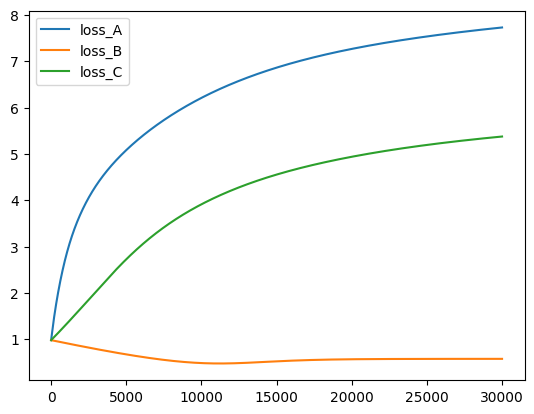

grandiet sum A: 0.17108350816837292
grandiet sum B: 7.455149136808097e-05
grandiet sum C: 0.13891864508330143
loss A: 7.727124206391999
loss B: 0.57519478216448
loss C: 5.3735935635779635


In [100]:
plt.plot(loss_list1)
plt.plot(loss_list2)
plt.plot(loss_list3)
plt.legend(['loss_A', 'loss_B', 'loss_C'])
# plt.ylim(0, 0.4)
plt.show()
print('grandiet sum A:', grad_abs_sum_list1[-1])
print('grandiet sum B:', grad_abs_sum_list2[-1])
print('grandiet sum C:', grad_abs_sum_list3[-1])

print('loss A:', loss_list1[-1])
print('loss B:', loss_list2[-1])
print('loss C:', loss_list3[-1])

In [ ]:
# h_overall_new = h_overall_record - h_generated_by_unlearning_target
# A_contribution_after_reduce = delta_h_A_record / (delta_h_A_record + delta_h_B_record + delta_h_C_record)
# h_overall_A = h_overall_new
# for i in range(iterations):
#     if asynchronous:
#         # A
#         h_A1 = np.dot(X_A, theta_A)
#         grad_A = np.dot(X_A.T, (sigmoid(h_overall_A) - y)) / len(y)
#         theta_A -= learning_rate * grad_A
#         delta_h_A1 = np.dot(X_A, theta_A) - h_A1
#         delta_h_overallA = delta_h_A1 / A_contribution_after_reduce
#         h_overall_A += delta_h_overallA
#     if batch:
#         grad_A = np.dot(X_A.T, (sigmoid(h_overall_new) - y)) / len(y)
#         grad_B = np.dot(X_B.T, (sigmoid(h_overall_new) - y)) / len(y)
#         grad_C = np.dot(X_C.T, (sigmoid(h_overall_new) - y)) / len(y)
#         theta_A -= learning_rate * grad_A
#         theta_B -= learning_rate * grad_B
#         theta_C -= learning_rate * grad_C
#         h_overall_new = np.dot(X_A, theta_A) + np.dot(X_B, theta_B) + np.dot(X_C, theta_C)